In [1]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

#p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Pier 21\Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)

#p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Pier 21\Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)

#p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Pier 21\Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH.drop(labels=range(len(p21_1323_LH)-6,len(p21_1323_LH)), axis=0, inplace=True)

#directory_path = '/Users/rprocious/Downloads/data/NOAA/pier21/'
directory_path = r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\NOAA\pier21'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

p21_NOAA = pd.concat(dataframes, ignore_index=True)
frames = [p21_9300_LH,p21_0112_LH,p21_1323_LH]
p21_LH = pd.concat(frames, ignore_index=True)
p21_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
p21_NOAA.reset_index(drop = True, inplace=True)
p21_LH.drop(labels=range(0,262800),axis=0, inplace=True)
p21_LH.reset_index(drop=True, inplace=True)
comparison_df_P21 = pd.DataFrame()
comparison_df_P21['Dates'] = p21_LH['#date+time']
comparison_df_P21['Lighthouse WL'] = p21_LH['022-pwl']
comparison_df_P21['NOAA WL'] = p21_NOAA[' Water Level']
comparison_df_P21['Dates'] = pd.to_datetime(comparison_df_P21['Dates'])
comparison_df_P21['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df_P21['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df_P21['Lighthouse WL'] = pd.to_numeric(comparison_df_P21['Lighthouse WL'],errors= 'coerce')
comparison_df_P21['NOAA WL'] = pd.to_numeric(comparison_df_P21['NOAA WL'],errors='coerce')

P21_2007 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\pier21-2007-output.csv')
#P21_2007 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/pier21-2007-output.csv')
P21_2008 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\pier21-2008-output.csv')
#P21_2008 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/pier21-2008-output.csv')
P21_2007.reset_index(drop = True, inplace=True)
P21_2008.reset_index(drop = True, inplace=True)
P21_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
P21_2007['Dates'] = pd.to_datetime(P21_2007['Date'])
P21_2007['Water Level'] = pd.to_numeric(P21_2007['Water Level'], errors='coerce')
P21_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
P21_2008['Dates'] = pd.to_datetime(P21_2008['Date'])
P21_2008['Water Level'] = pd.to_numeric(P21_2008['Water Level'], errors='coerce')
P21 = pd.concat([P21_2007,P21_2008],ignore_index=True)
total_df = P21.merge(comparison_df_P21,on='Dates',how='outer')
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rprocious\\PSM Lighthouse\\CBI\\data 2\\lighthouse\\Pier 21\\Pier21_1993-2000_pwl_harmwl_bwl.csv'

In [ ]:
total_df

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
0,NaN,1996-01-01 00:00:00,1.634,1.634,NaN
1,NaN,1996-01-01 00:06:00,1.648,1.648,NaN
2,NaN,1996-01-01 00:12:00,1.657,1.657,NaN
3,NaN,1996-01-01 00:18:00,1.664,1.664,NaN
4,NaN,1996-01-01 00:24:00,1.654,1.654,NaN
...,...,...,...,...,...
2539517,NaN,2023-12-31 23:30:00,1.547,1.548,NaN
2539518,NaN,2023-12-31 23:36:00,1.548,1.542,NaN
2539519,NaN,2023-12-31 23:42:00,1.542,1.553,NaN
2539520,NaN,2023-12-31 23:48:00,1.553,1.579,NaN


Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1125 ticks ([8994.0, ..., 20234.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

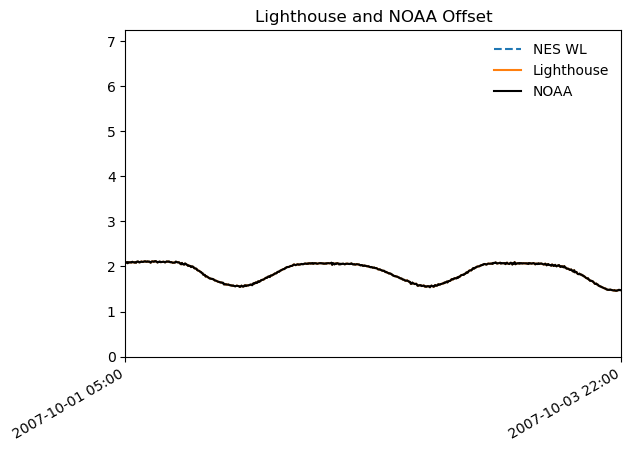

In [ ]:
plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(0,7.25)

start_date = pd.to_datetime('2007-10-01 05:00')

end_date = pd.to_datetime('2007-10-03 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')